In [15]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


# RFE for Classification

In [23]:
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

In [35]:
X = pd.DataFrame(x, columns=[f"fet_{i}" for i in range(0,10)])
X.head()

,fet_0,fet_1,fet_2,fet_3,fet_4,fet_5,fet_6,fet_7,fet_8,fet_9
0,2.569995,-0.130200,3.160751,-4.359364,-1.612720,-1.393521,-2.489249,-1.930941,3.261304,2.056921
1,0.341293,2.513214,-0.804166,1.291966,2.057731,-3.110983,1.465830,6.247344,-1.927694,2.950315
2,2.275400,3.365615,0.171644,1.248620,0.302498,-1.137814,-1.608199,2.746938,0.134924,2.003395
3,0.357846,0.905176,-0.259241,0.930414,0.112336,0.143484,-0.367149,0.658955,-0.269128,0.155807
4,-2.722477,0.324236,2.906472,-0.021218,-2.867399,1.591744,0.620849,3.383528,0.945621,3.498071


In [11]:
# EXECUTE THE PREDICTION REMOVING THE REDUNTANT FEATURES
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")

In [17]:
print(f"Mean: {np.mean(n_scores):.2f}, Std: {np.std(n_scores):.2f}")

Mean: 0.89, Std: 0.03


In [18]:
# EXECUTE THE PREDICTION WITHOUT REMOVING THE REDUNTANT FEATURES
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('m', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")

In [19]:
print(f"Mean: {np.mean(n_scores):.2f}, Std: {np.std(n_scores):.2f}")

Mean: 0.88, Std: 0.03


In [25]:
# ONLY SEE THE RFE RESULT 
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(x,y)
n_x = rfe.transform(x)

In [34]:
pd.DataFrame(n_x, columns=[f"fet_{i}" for i in range(5)]).head()

,fet_0,fet_1,fet_2,fet_3,fet_4
0,3.160751,-4.359364,-1.612720,-2.489249,3.261304
1,-0.804166,1.291966,2.057731,1.465830,-1.927694
2,0.171644,1.248620,0.302498,-1.608199,0.134924
3,-0.259241,0.930414,0.112336,-0.367149,-0.269128
4,2.906472,-0.021218,-2.867399,0.620849,0.945621


# RFE for Regression

In [38]:
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor

In [37]:
x, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

In [39]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[("s", rfe), ("m", model)])

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, x, y, scoring="neg_mean_absolute_error", cv=cv, n_jobs=-1, error_score="raise")

In [42]:
# THE MAE (MEAN ABSOLUTE ERROR) ON SKLEARN IS NEGATIVE, SO THAT IT IS MAXIMIZED INSTEAD OF MINIMIZED. THIS MEANS THAT 
# LARGER MAE ARE BETTER
print(f"{np.mean(n_scores):.2f}, {np.std(n_scores):.2f}")

-27.14, 2.34


# Explore Number of Features

In [54]:
import pandas as pd
import numpy as np 

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

In [46]:
def get_dataset():
    x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return x, y

In [49]:
def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        pipeline = Pipeline(steps=[("s", rfe), ("m", model)])
        
        models[str(i)] = pipeline
    return models

In [50]:
def evaluate_model(mode, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")
    return scores

In [53]:
x, y = get_dataset()
models = get_models()

results = []
names = []

for name, model in models.items():
    score = evaluate_model(model, x, y)
    results.append(score)
    names.append(name)
    print(f">{name} Mean: {np.mean(score):.2f}, std: {np.std(score):.2f}")
    

>2 Mean: 0.72, std: 0.05
>3 Mean: 0.82, std: 0.03
>4 Mean: 0.88, std: 0.03
>5 Mean: 0.89, std: 0.03
>6 Mean: 0.89, std: 0.03
>7 Mean: 0.89, std: 0.02
>8 Mean: 0.89, std: 0.02
>9 Mean: 0.89, std: 0.02


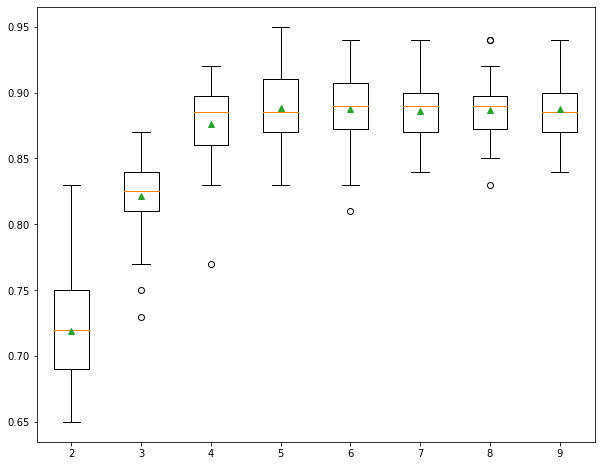

In [57]:
fig = plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Automatically Select the Number of Features

In [58]:
import pandas as pd
import numpy as np 

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

In [75]:
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=12)

In [61]:
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[("s", rfe), ("m", model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_score = cross_val_score(pipeline, x, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise")

print(f"Mean: {np.mean(n_score):.2f}, Std: {np.std(n_score):.2f}")

Mean: 0.88, Std: 0.03


In [76]:
rfe.fit(x,y)
for i in range(x.shape[1]):
    print(f"Column: {i}, Selected: {rfe.support_[i]}, Rank: {rfe.ranking_[i]}")

Column: 0, Selected: True, Rank: 1
Column: 1, Selected: True, Rank: 1
Column: 2, Selected: True, Rank: 1
Column: 3, Selected: True, Rank: 1
Column: 4, Selected: True, Rank: 1
Column: 5, Selected: True, Rank: 1
Column: 6, Selected: True, Rank: 1
Column: 7, Selected: True, Rank: 1
Column: 8, Selected: False, Rank: 2
Column: 9, Selected: True, Rank: 1


# Test Base Algorithms

>lr 0.889 (0.033)
>per 0.850 (0.039)
>cart 0.887 (0.034)
>rf 0.858 (0.032)
>gbm 0.887 (0.030)


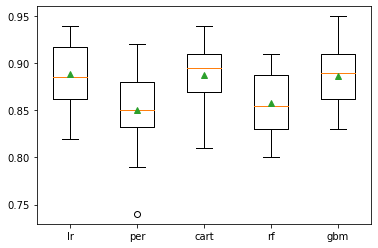

In [80]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	# lr
	rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
	# perceptron
	rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
	# cart
	rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
	# rf
	rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
	# gbm
	rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
	model = DecisionTreeClassifier()
	models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()